<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Reduced time_step to 25 for test data.
Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.2716
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0617
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0331
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0441
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0188
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0199
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0238
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0221
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0143
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0143
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0172
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0136
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0133
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0122
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0128
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


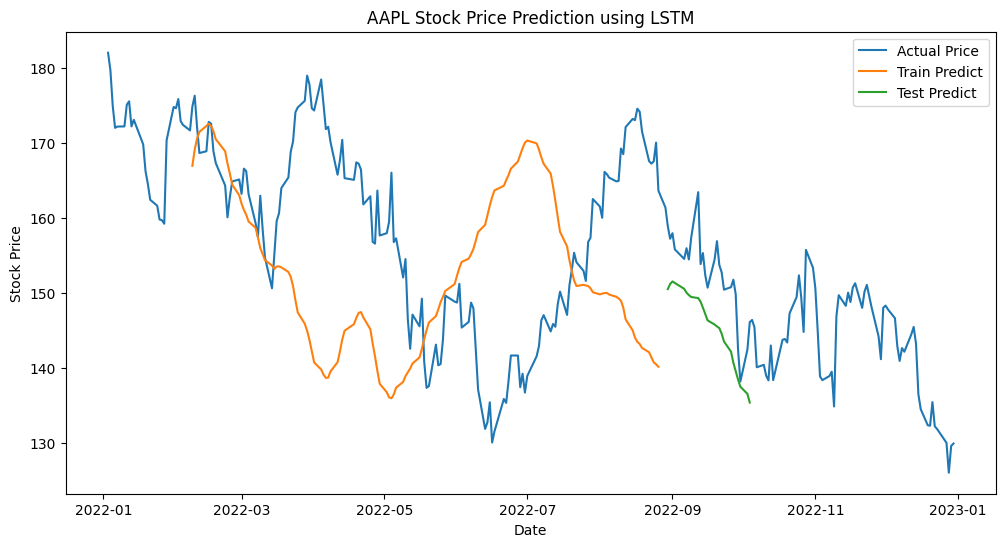

In [ ]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 1. 데이터 수집
# 원하는 주식 티커와 기간 설정 (예: 애플 주식 'AAPL', 1년치 데이터)
ticker = 'AAPL'
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")
data = data[['Close']]  # 종가 데이터만 사용

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 데이터 정규화
scaled_data = scaler.fit_transform(data)

# 학습 데이터와 테스트 데이터를 나누는 인덱스 설정 (예: 80% 학습, 20% 테스트)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# LSTM 입력 형식으로 데이터 준비
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # 과거 60일 데이터를 기반으로 예측
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# LSTM 모델 입력 형태로 데이터 재구성 (samples, time steps, features)
#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Adjust time_step or train_size if X_test is empty
if X_test.shape[0] == 0:
    # Option 1: Reduce time_step
    time_step = int(len(test_data) * 0.5)  # Example: Use 50% of test data length
    X_test, y_test = create_dataset(test_data, time_step)
    print(f"Reduced time_step to {time_step} for test data.")


# 3. LSTM 모델 정의
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# 4. 모델 컴파일과 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1)

# 5. 예측 및 결과 시각화
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 결과를 원래 값으로 되돌리기 (역정규화)
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

# 6. 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(data.index[time_step:time_step+len(train_predict)], train_predict, label='Train Predict')

# Fix: Adjust the x-axis range for the test prediction plot to match the size of test_predict
plt.plot(data.index[time_step+len(train_predict)+1:time_step+len(train_predict)+1+len(test_predict)], # Corrected x-axis range
             test_predict[:,0], # Access the first column of test_predict if it's 2D
             label='Test Predict')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction using LSTM")
plt.legend()
plt.show()
